In [258]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [18]:
def read_and_concat_csv(filepath, quantity):
    temp_df_A = pd.DataFrame()
    for x in range(quantity):
        temp_df_B = pd.read_csv(f'{filepath}{x+1}.csv')
        temp_df_A = pd.concat([temp_df_A, temp_df_B])
    return temp_df_A

In [19]:
daily_2018_standard = pd.DataFrame()

In [20]:
daily_2018_standard = read_and_concat_csv('../data/batters_2018_daily/batters_2018_daily_standard', 6)

In [22]:
daily_2018_advanced = read_and_concat_csv('../data/batters_2018_daily/batters_2018_daily_advanced', 6)

In [23]:
daily_2018_battedballs = read_and_concat_csv('../data/batters_2018_daily/batters_2018_daily_battedballs', 6)

In [24]:
daily_2018_standard.shape

(51842, 24)

In [25]:
daily_2018_advanced.shape

(51842, 18)

In [26]:
daily_2018_battedballs.shape

(51842, 19)

In [143]:
daily_2018 = daily_2018_standard.merge(daily_2018_advanced)

In [144]:
daily_2018 = daily_2018.merge(daily_2018_battedballs)

In [145]:
# daily_2018.to_csv('../data/batters_2018_daily_master.csv', index=False)

In [146]:
daily_2018 = pd.read_csv('../data/batters_2018_daily_master.csv')

In [147]:
daily_2018.columns

Index(['Date', 'Name', 'Tm', 'G', 'PA', 'AB', 'H', '1B', '2B', '3B', 'HR', 'R',
       'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'AVG',
       'playerId', 'BB%', 'K%', 'BB/K', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP',
       'wRC', 'wRAA', 'wOBA', 'wRC+', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%',
       'HR/FB', 'IFH%', 'BUH%', 'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%',
       'Hard%'],
      dtype='object')

In [148]:
drop_cols = ['Tm', 'G', 'AB', '1B', '2B', '3B', 'HR', 'R',
             'RBI', 'SF', 'SH', 'GDP', 'SB', 'CS']

In [149]:
daily_2018.drop(columns=drop_cols, inplace=True)

In [150]:
daily_2018.shape

(52340, 36)

In [151]:
daily_2018.head()

,Date,Name,PA,H,BB,IBB,SO,HBP,AVG,playerId,...,IFFB%,HR/FB,IFH%,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%
0,2018-03-29,Ozzie Albies,5,1,0,0,1,0,0.200000,16556,...,0.0,0.333333,0.0,0.0,0.25,0.5,0.25,0.0,0.75,0.25
1,2018-03-29,Maikel Franco,4,0,2,0,0,0,0.000000,12179,...,0.0,0.000000,0.0,0.0,0.50,0.0,0.50,0.0,1.00,0.00
2,2018-03-29,Evan Gattis,4,0,1,0,2,0,0.000000,11003,...,0.0,0.000000,0.0,0.0,0.00,1.0,0.00,0.0,1.00,0.00
3,2018-03-29,Yoan Moncada,6,1,0,0,2,0,0.166667,17232,...,0.0,0.000000,0.0,0.0,0.50,0.5,0.00,0.0,0.00,1.00
4,2018-03-29,Peter Bourjos,0,0,0,0,0,0,0.000000,2578,...,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00


In [152]:
daily_2018.dtypes

Date         object
Name         object
PA            int64
H             int64
BB            int64
IBB           int64
SO            int64
HBP           int64
AVG         float64
playerId      int64
BB%         float64
K%          float64
BB/K        float64
OBP         float64
SLG         float64
OPS         float64
ISO         float64
BABIP       float64
wRC         float64
wRAA        float64
wOBA        float64
wRC+        float64
GB/FB       float64
LD%         float64
GB%         float64
FB%         float64
IFFB%       float64
HR/FB       float64
IFH%        float64
BUH%        float64
Pull%       float64
Cent%       float64
Oppo%       float64
Soft%       float64
Med%        float64
Hard%       float64
dtype: object

In [153]:
daily_2018.playerId.nunique()

992

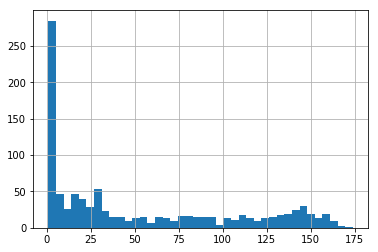

In [154]:
daily_2018.playerId.value_counts().hist(bins=40);

In [155]:
daily_2018.playerId.value_counts().describe()

count    992.000000
mean      52.762097
std       54.220667
min        1.000000
25%        4.000000
50%       28.000000
75%      100.250000
max      174.000000
Name: playerId, dtype: float64

In [156]:
under_25pct = []
for player in daily_2018.playerId.unique():
    if daily_2018[daily_2018['playerId'] == player].Date.count() < 41:
        under_25pct.append(player)

In [157]:
len(under_25pct)

571

In [161]:
for player in under_25pct:
    daily_2018 = daily_2018[daily_2018['playerId'] != player]

In [162]:
daily_2018.shape

(45741, 36)

In [160]:
daily_2018.head()

,Date,Name,PA,H,BB,IBB,SO,HBP,AVG,playerId,...,IFFB%,HR/FB,IFH%,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%
0,2018-03-29,Ozzie Albies,5,1,0,0,1,0,0.200000,16556,...,0.0,0.333333,0.0,0.0,0.25,0.5,0.25,0.0,0.75,0.25
1,2018-03-29,Maikel Franco,4,0,2,0,0,0,0.000000,12179,...,0.0,0.000000,0.0,0.0,0.50,0.0,0.50,0.0,1.00,0.00
2,2018-03-29,Evan Gattis,4,0,1,0,2,0,0.000000,11003,...,0.0,0.000000,0.0,0.0,0.00,1.0,0.00,0.0,1.00,0.00
3,2018-03-29,Yoan Moncada,6,1,0,0,2,0,0.166667,17232,...,0.0,0.000000,0.0,0.0,0.50,0.5,0.00,0.0,0.00,1.00
4,2018-03-29,Peter Bourjos,0,0,0,0,0,0,0.000000,2578,...,0.0,0.000000,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00


In [165]:
daily_2018.playerId.nunique()

421

In [174]:
daily_2018.isnull().sum()

Date        0
Name        0
PA          0
H           0
BB          0
IBB         0
SO          0
HBP         0
AVG         0
playerId    0
BB%         0
K%          0
BB/K        0
OBP         0
SLG         0
OPS         0
ISO         0
BABIP       0
wRC         0
wRAA        0
wOBA        0
wRC+        0
GB/FB       0
LD%         0
GB%         0
FB%         0
IFFB%       0
HR/FB       0
IFH%        0
BUH%        0
Pull%       0
Cent%       0
Oppo%       0
Soft%       0
Med%        0
Hard%       0
dtype: int64

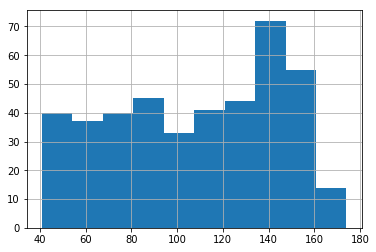

In [177]:
daily_2018.playerId.value_counts().hist()

In [166]:
custom_daily_2018 = pd.DataFrame()

In [167]:
pd.options.mode.chained_assignment = None  # default='warn'

In [168]:
for player in daily_2018.playerId.unique():
    player_df = daily_2018[daily_2018['playerId'] == player]
    player_df['Date'] = pd.to_datetime(player_df['Date'])
    player_df.set_index('Date', inplace=True)
    
    player_df['prev3_avg'] = player_df.H.rolling(3).sum() / player_df.PA.rolling(3).sum()
    player_df['prev5_avg'] = player_df.H.rolling(5).sum() / player_df.PA.rolling(5).sum()
    player_df['next_game_hit'] = (player_df.H.shift(-1) != 0)
    custom_daily_2018 = custom_daily_2018.append(player_df)

In [169]:
custom_daily_2018.shape

(45741, 38)

In [172]:
custom_daily_2018.head()

,Name,PA,H,BB,IBB,SO,HBP,AVG,playerId,BB%,...,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,prev3_avg,prev5_avg,next_game_hit
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-29,Ozzie Albies,5,1,0,0,1,0,0.200000,16556,0.0,...,0.0,0.25,0.5,0.25,0.0,0.75,0.25,NaN,NaN,False
2018-03-30,Ozzie Albies,5,0,0,0,0,0,0.000000,16556,0.0,...,0.0,0.60,0.0,0.40,0.4,0.40,0.20,NaN,NaN,True
2018-03-31,Ozzie Albies,6,1,0,0,1,0,0.166667,16556,0.0,...,0.0,0.60,0.2,0.20,0.2,0.80,0.00,0.125000,NaN,False
2018-04-02,Ozzie Albies,4,0,0,0,2,0,0.000000,16556,0.0,...,0.0,0.00,0.5,0.50,0.0,0.50,0.50,0.066667,NaN,True
2018-04-03,Ozzie Albies,5,3,0,0,1,0,0.600000,16556,0.0,...,0.0,0.50,0.5,0.00,0.0,0.50,0.50,0.266667,0.2,False


In [179]:
custom_daily_2018 = custom_daily_2018.sort_index()

In [193]:
custom_daily_2018.isnull().sum()

Name                0
PA                  0
H                   0
BB                  0
IBB                 0
SO                  0
HBP                 0
AVG                 0
playerId            0
BB%                 0
K%                  0
BB/K                0
OBP                 0
SLG                 0
OPS                 0
ISO                 0
BABIP               0
wRC                 0
wRAA                0
wOBA                0
wRC+                0
GB/FB               0
LD%                 0
GB%                 0
FB%                 0
IFFB%               0
HR/FB               0
IFH%                0
BUH%                0
Pull%               0
Cent%               0
Oppo%               0
Soft%               0
Med%                0
Hard%               0
prev3_avg         844
prev5_avg        1684
next_game_hit       0
dtype: int64

In [195]:
custom_daily_2018.dropna(inplace=True)

In [196]:
# What index gives us our 80th percentile of rows?
custom_daily_2018.shape[0] * (4 / 5)

35244.0

In [197]:
# Set training data to be first 80% of rows.
train = custom_daily_2018.iloc[0:35244]

# Check shape to confirm we did this properly.
train.shape

(35244, 38)

In [198]:
# Set testing data to be last 20% of rows.
test = custom_daily_2018.iloc[35244:]

# Check shape to confirm we did this properly.
test.shape

(8811, 38)

In [199]:
X_train = train.drop(columns=['Name', 'playerId', 'next_game_hit'])
y_train = train['next_game_hit']

In [200]:
X_test = test.drop(columns=['Name', 'playerId', 'next_game_hit'])
y_test = test['next_game_hit']

In [201]:
logreg = LogisticRegression()
ss = StandardScaler()

In [202]:
ss.fit_transform(X_train)
ss.transform(X_test)

/Users/BK/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/BK/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/BK/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


array([[ 0.16896413, -0.96867083, -0.56438874, ..., -1.02146063,
        -1.12140866,  0.13496971],
       [-0.63272835,  0.15195398, -0.56438874, ...,  0.49190116,
        -0.43494554, -0.23933042],
       [-0.63272835, -0.96867083,  1.15676007, ..., -1.02146063,
        -0.8598989 ,  0.06298892],
       ...,
       [ 0.16896413,  0.15195398, -0.56438874, ..., -0.01265366,
         0.20248451,  0.2519385 ],
       [ 0.16896413,  0.15195398, -0.56438874, ..., -0.01265366,
         0.20248451, -0.56684304],
       [-2.23611332,  0.15195398, -0.56438874, ...,  2.00526295,
         3.38963475,  1.72574529]])

In [203]:
logreg.fit(X_train, y_train)

/Users/BK/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [205]:
print(f'Logreg predicted values: {logreg.predict(X_train.head())}')

Logreg predicted values: [ True  True  True  True  True]


In [206]:
print(f'Logreg predicted probabilities: {logreg.predict_proba(X_train.head())}')

Logreg predicted probabilities: [[0.40620217 0.59379783]
 [0.45002889 0.54997111]
 [0.42699159 0.57300841]
 [0.3879912  0.6120088 ]
 [0.41712459 0.58287541]]


In [207]:
y_train.head()

Date
2018-04-01     True
2018-04-01    False
2018-04-01     True
2018-04-02     True
2018-04-02    False
Name: next_game_hit, dtype: bool

In [211]:
predictions = logreg.predict(X_test)

In [236]:
def score_model(actuals, predictions):
    tn, fp, fn, tp = confusion_matrix(actuals, predictions).ravel()
    print(f'T Pos: {tp},   F Pos: {fp}')
    print(f'F Neg: {fn},   T Neg: {tn}')
    print(f'Accuracy: {(tp+tn)/len(predictions)}')
    print(f'Precision: {tp/(tp+fp)}')

In [237]:
score_model(y_test, predictions)

T Pos: 4685,   F Pos: 3232
F Neg: 406,   T Neg: 488
Accuracy: 0.5871070253092725
Precision: 0.5917645572817987


In [227]:
all_true = [True for x in range(len(y_test))]

In [238]:
score_model(y_test, all_true)

T Pos: 5091,   F Pos: 3720
F Neg: 0,   T Neg: 0
Accuracy: 0.5778004766768812
Precision: 0.5778004766768812


In [239]:
pred_proba = [i[1] for i in logreg.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

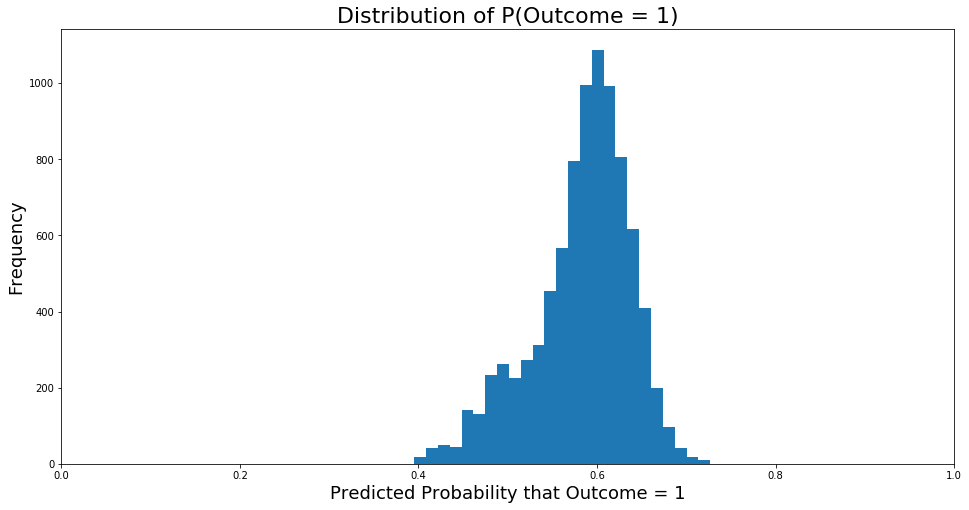

In [257]:
plt.figure(figsize = (16,8))

plt.hist(pred_df['pred_probs'], bins=25)

plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.xlim(0,1);

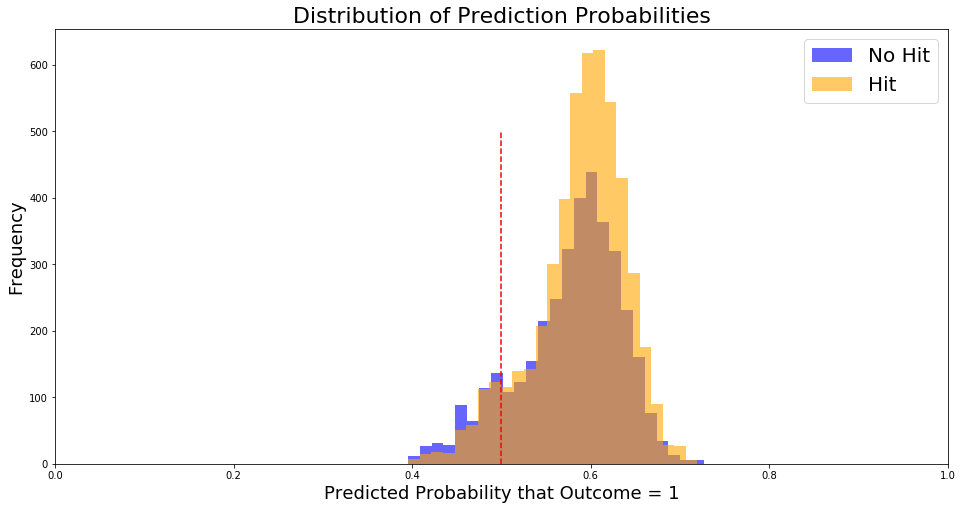

In [256]:
plt.figure(figsize = (16,8))

plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='No Hit')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Hit')

plt.vlines(x=0.5,
           ymin = 0,
           ymax = 500,
           color='r',
           linestyle = '--')

plt.title('Distribution of Prediction Probabilities', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.xlim(0,1)

plt.legend(fontsize=20);

In [267]:
rf = RandomForestClassifier(n_estimators=10, random_state=6)

In [268]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.5272102902650647

In [269]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=6, verbose=0, warm_start=False)

In [270]:
rf.score(X_train, y_train)

0.9704063102939507

In [271]:
rf.score(X_test, y_test)

0.5209397344228804

In [272]:
rf_preds = rf.predict(X_test)

In [273]:
score_model(y_test, rf_preds)

T Pos: 2961,   F Pos: 2091
F Neg: 2130,   T Neg: 1629
Accuracy: 0.5209397344228804
Precision: 0.586104513064133


In [274]:
rf = RandomForestClassifier(random_state=6)
rf_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 6, 7],
    'max_features': [4, 5, 6],
    'min_samples_split': [2, 5, 9]
}

In [275]:
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=6, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [5, 6, 7], 'max_features': [4, 5, 6], 'min_samples_split': [2, 5, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [276]:
gs.score(X_train, y_train)

0.6069118147769833

In [277]:
gs.score(X_test, y_test)

0.5873340143003064

In [279]:
gs_preds = gs.predict(X_test)

In [280]:
score_model(y_test, gs_preds)

T Pos: 4775,   F Pos: 3320
F Neg: 316,   T Neg: 400
Accuracy: 0.5873340143003064
Precision: 0.5898702903026559


In [282]:
gs_pred_proba = [i[1] for i in logreg.predict_proba(X_test)]

gs_pred_df = pd.DataFrame({'true_values': y_test,
                           'pred_probs':gs_pred_proba})

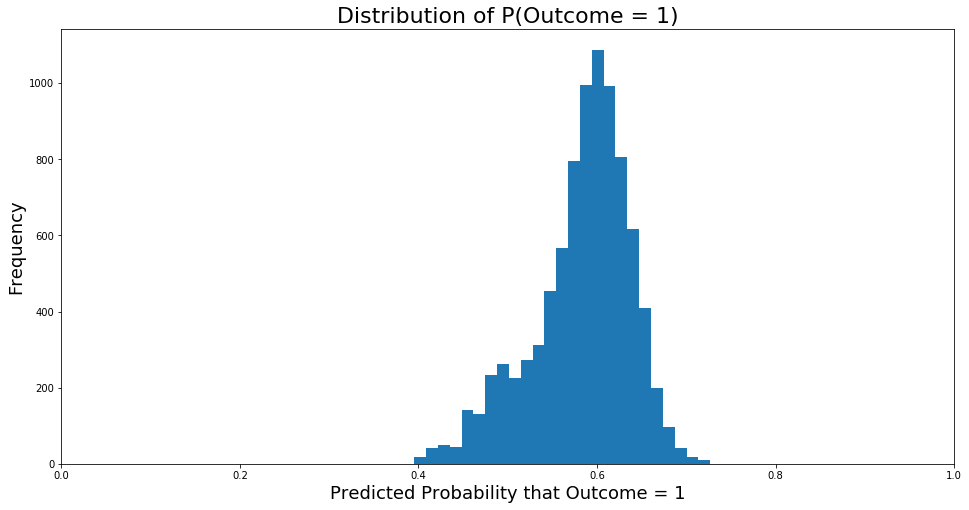

In [283]:
plt.figure(figsize = (16,8))

plt.hist(gs_pred_df['pred_probs'], bins=25)

plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.xlim(0,1);

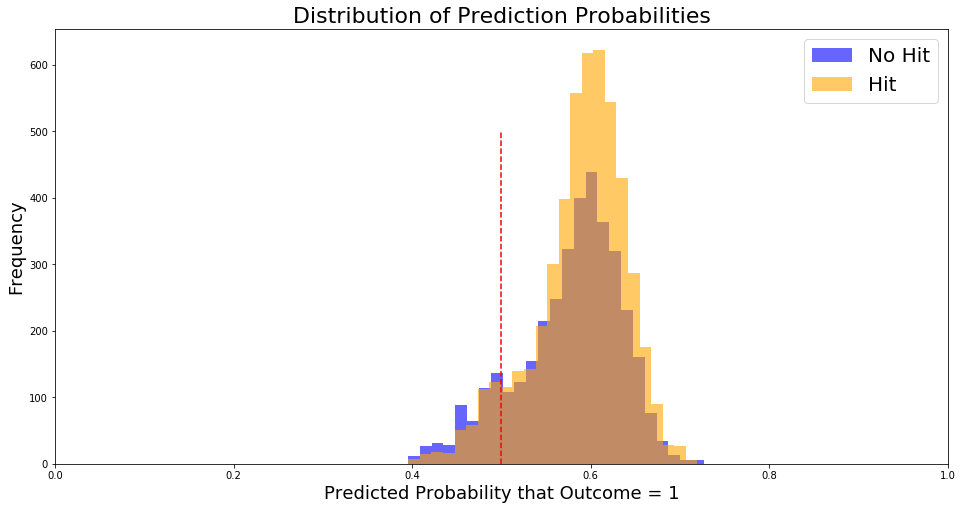

In [284]:
plt.figure(figsize = (16,8))

plt.hist(gs_pred_df[gs_pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='No Hit')
plt.hist(pred_df[gs_pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Hit')

plt.vlines(x=0.5,
           ymin = 0,
           ymax = 500,
           color='r',
           linestyle = '--')

plt.title('Distribution of Prediction Probabilities', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.xlim(0,1)

plt.legend(fontsize=20);

___

# Players with > 162 rows

In [92]:
over_162 = []
for player in daily_2018.playerId.unique():
    if daily_2018[daily_2018['playerId'] == player].Date.count() > 162:
        over_162.append(player)

In [93]:
over_162

[4922, 5930, 11602, 11493, 4949, 2396, 5361, 10556, 11579, 16252]

In [105]:
daily_2018[daily_2018.playerId == 5930].head()

,Date,Name,PA,H,BB,IBB,SO,HBP,AVG,playerId,...,IFFB%,HR/FB,IFH%,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%
16,2018-03-29,Nick Markakis,5,1,0,0,1,0,0.200000,5930,...,0.5,0.5,0.0,0.0,0.5000,0.2500,0.2500,0.2500,0.2500,0.5000
342,2018-03-30,Nick Markakis,5,1,1,0,0,0,0.250000,5930,...,0.0,0.0,0.0,0.0,0.0000,0.5000,0.5000,0.2500,0.5000,0.2500
791,2018-03-31,Nick Markakis,6,2,3,0,1,0,0.666667,5930,...,0.0,0.0,0.0,0.0,0.0000,0.0000,1.0000,0.5000,0.5000,0.0000
1094,2018-04-02,Nick Markakis,4,0,0,0,1,0,0.000000,5930,...,0.0,0.0,0.0,0.0,0.3333,0.3333,0.3333,0.3333,0.3333,0.3333
1393,2018-04-03,Nick Markakis,5,3,0,0,0,0,0.600000,5930,...,0.0,0.0,0.0,0.0,0.4000,0.0000,0.6000,0.0000,0.8000,0.2000


In [106]:
daily_2018[daily_2018['playerId'] == 5930].Date.count()

174

In [107]:
daily_2018[daily_2018['playerId'] == 5930].PA.sum()

753

In [109]:
daily_2018[daily_2018['playerId'] == 5930]

,Date,Name,PA,H,BB,IBB,SO,HBP,AVG,playerId,...,IFFB%,HR/FB,IFH%,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%
16,2018-03-29,Nick Markakis,5,1,0,0,1,0,0.200000,5930,...,0.5,0.500000,0.0,0.0,0.5000,0.2500,0.2500,0.2500,0.2500,0.5000
342,2018-03-30,Nick Markakis,5,1,1,0,0,0,0.250000,5930,...,0.0,0.000000,0.0,0.0,0.0000,0.5000,0.5000,0.2500,0.5000,0.2500
791,2018-03-31,Nick Markakis,6,2,3,0,1,0,0.666667,5930,...,0.0,0.000000,0.0,0.0,0.0000,0.0000,1.0000,0.5000,0.5000,0.0000
1094,2018-04-02,Nick Markakis,4,0,0,0,1,0,0.000000,5930,...,0.0,0.000000,0.0,0.0,0.3333,0.3333,0.3333,0.3333,0.3333,0.3333
1393,2018-04-03,Nick Markakis,5,3,0,0,0,0,0.600000,5930,...,0.0,0.000000,0.0,0.0,0.4000,0.0000,0.6000,0.0000,0.8000,0.2000
1607,2018-04-04,Nick Markakis,4,1,0,0,2,0,0.250000,5930,...,0.0,0.000000,0.0,0.0,0.5000,0.0000,0.5000,0.5000,0.5000,0.0000
2179,2018-04-06,Nick Markakis,5,1,1,0,0,0,0.250000,5930,...,0.0,0.000000,0.0,0.0,0.2500,0.2500,0.5000,0.2500,0.2500,0.5000
2324,2018-04-07,Nick Markakis,5,1,1,0,0,0,0.250000,5930,...,0.0,0.000000,0.0,0.0,0.2500,0.5000,0.2500,0.0000,0.7500,0.2500
2780,2018-04-08,Nick Markakis,4,2,0,0,1,0,0.500000,5930,...,0.0,1.000000,0.0,0.0,0.3333,0.6667,0.0000,0.0000,0.6667,0.3333
2981,2018-04-09,Nick Markakis,3,1,0,0,1,0,0.333333,5930,...,0.0,0.000000,0.0,0.0,0.0000,1.0000,0.0000,0.0000,0.5000,0.5000


In [286]:
daily_2018[daily_2018['playerId'] == 5930].Name.value_counts()

Nick Markakis    174
Name: Name, dtype: int64

In [ ]:
daily_2018[daily_2018['playerId'] == 9218].PA.sum()

In [72]:
over_162

{False, True}

In [5]:
daily_2018_raw.shape

(53761, 25)